In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import graphviz as gz

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(12, 5)})

from matplotlib import style
STYLE = "gt.mplstyle"
style.use(STYLE)

# Load and Cleaning Data

In [2]:
non_rand_discount_df = pd.read_csv("data/non_rand_discount.csv", delimiter=";")
non_rand_discount_df.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [3]:
non_rand_discount_df.dtypes[non_rand_discount_df.dtypes == "object"]

discount      object
cust_state    object
dtype: object

In [4]:
non_rand_discount_df.columns

Index(['spend_1m_baby', 'spend_2m_baby', 'spend_3m_baby', 'spend_4m_baby',
       'spend_5m_baby', 'spend_6m_baby', 'spend_1m_clothes',
       'spend_2m_clothes', 'spend_3m_clothes', 'spend_4m_clothes',
       'spend_5m_clothes', 'spend_6m_clothes', 'spend_1m_health',
       'spend_2m_health', 'spend_3m_health', 'spend_4m_health',
       'spend_5m_health', 'spend_6m_health', 'spend_1m_pet', 'spend_2m_pet',
       'spend_3m_pet', 'spend_4m_pet', 'spend_5m_pet', 'spend_6m_pet',
       'spend_1m_groceries', 'spend_2m_groceries', 'spend_3m_groceries',
       'spend_4m_groceries', 'spend_5m_groceries', 'spend_6m_groceries',
       'spend_1m_eletronic', 'spend_2m_eletronic', 'spend_3m_eletronic',
       'spend_4m_eletronic', 'spend_5m_eletronic', 'spend_6m_eletronic',
       'sales', 'discount', 'profit', 'age', 'gender', 'cust_state', 'tenure',
       'sales_prediction_bins', 'sales_prediction'],
      dtype='object')

In [5]:
non_rand_discount_df.gender
non_rand_discount_df.cust_state
non_rand_discount_df.discount

0        US$ 125.0
1         US$ 75.0
2         US$ 50.0
3         US$ 10.0
4        US$ 100.0
           ...    
14995    US$ 110.0
14996    US$ 135.0
14997      US$ 0.0
14998    US$ 145.0
14999     US$ 30.0
Name: discount, Length: 15000, dtype: object

In [6]:
discount_df = non_rand_discount_df["discount"].str.split(" ", expand=True)
discount_df[0].value_counts()
# only US$ as currency, we will have the discount column be a numeric.
clean_df = non_rand_discount_df.copy()

clean_df["discount"] = pd.to_numeric(discount_df[1])
clean_df["discount"]

0        125.0
1         75.0
2         50.0
3         10.0
4        100.0
         ...  
14995    110.0
14996    135.0
14997      0.0
14998    145.0
14999     30.0
Name: discount, Length: 15000, dtype: float64

In [7]:
clean_df.isnull().any()[clean_df.isnull().any() == True]    # gender has a null value
clean_df[clean_df["gender"].isnull()]

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
19,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2684.68,90.0,41.55,32,NaN,PR,11,5,1092.313246
27,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1691.62,55.0,27.89,27,NaN,MG,6,4,1057.924143
43,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2588.34,85.0,41.83,35,NaN,BA,6,5,1081.788129
50,0,0,0,0,0,0.0,0,0.0,0.0,345.0,...,0.0,4146.11,115.0,88.16,40,NaN,DF,9,8,1288.915615
59,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3152.57,120.0,34.48,40,NaN,MG,7,6,1166.935162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1918.91,45.0,49.03,31,NaN,RS,4,2,968.591470
14926,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1369.22,15.0,52.09,24,NaN,SP,10,0,835.826449
14931,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2647.00,90.0,39.70,37,NaN,SP,8,5,1089.933785
14938,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,4227.55,155.0,52.15,28,NaN,BA,7,9,1526.601401


## Comments

- The gender column has missing values. There are 1475 rows (is each row a unique customer?). Since the null values are not in the treatment variable (discount) or outcome variable(profit) we will leave it as is.

- The discount column is converted to a numeric. Since all currencies were in USD$, the currency is not recorded as a seperate column.

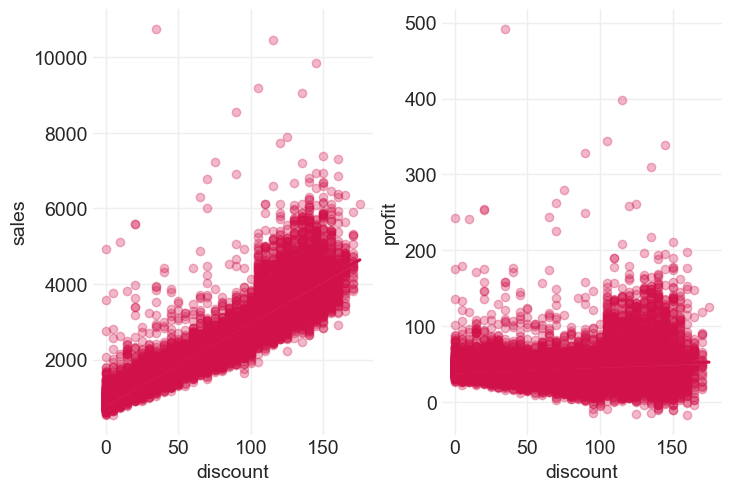

In [8]:
fig, axes = plt.subplots(1, 2)

sns.regplot(
    data=clean_df,
    x="discount",
    y="sales",
    ax=axes[0],
    scatter_kws={"alpha": 0.3},
)

sns.regplot(
    data=clean_df,
    x="discount",
    y="profit",
    ax=axes[1],
    scatter_kws={"alpha": 0.3},
)
plt.show()



There does seem to be a positive relationship between discount and sales. However, the relationship between profit and discount is unclear.

<Axes: xlabel='discount', ylabel='age'>

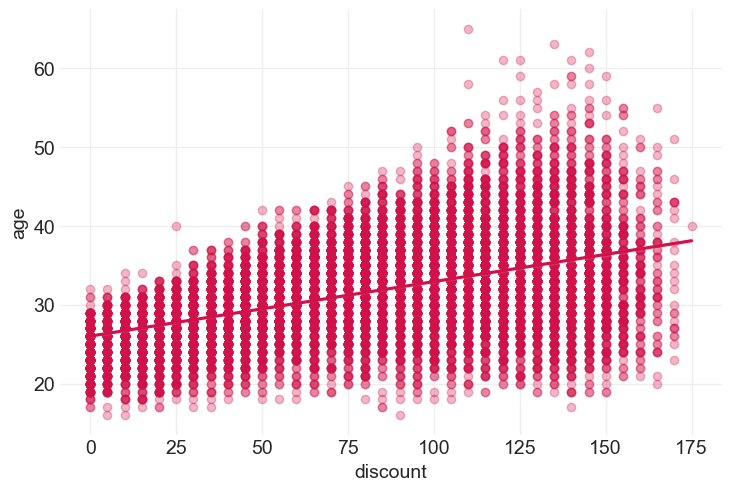

In [9]:
sns.regplot(data=clean_df, x="discount", y="age", scatter_kws={"alpha": 0.3})

There looks like a positive relationship between discount and age. Older people are likely to get more discount.

<Axes: xlabel='cust_state', ylabel='discount'>

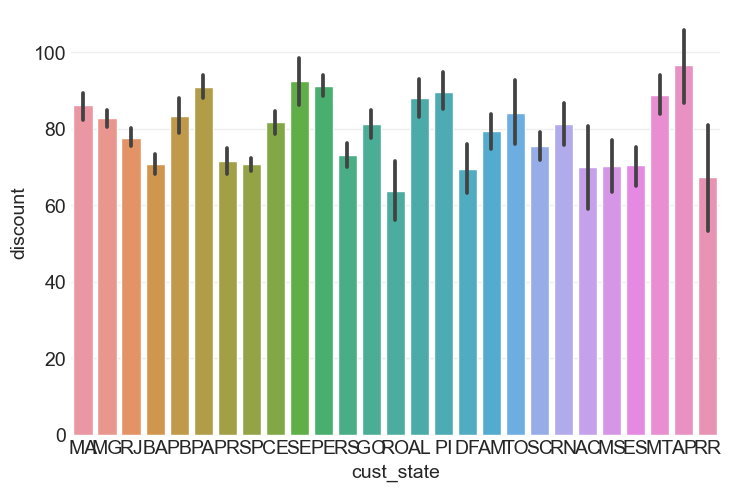

In [10]:
sns.barplot(data=clean_df, x="cust_state", y="discount")

Yes, different states get different discounts.

<Axes: xlabel='gender', ylabel='discount'>

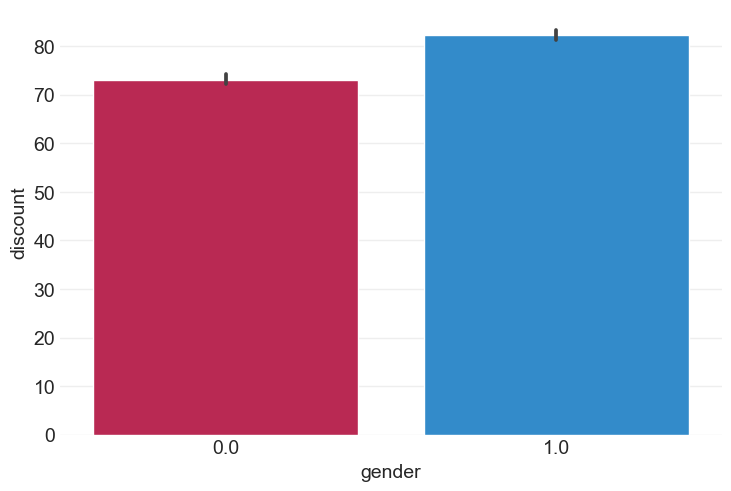

In [11]:
sns.barplot(data=clean_df, x="gender", y="discount")

Looks like there is a difference in discount given based on gender.

<Axes: xlabel='sales_prediction_bins', ylabel='discount'>

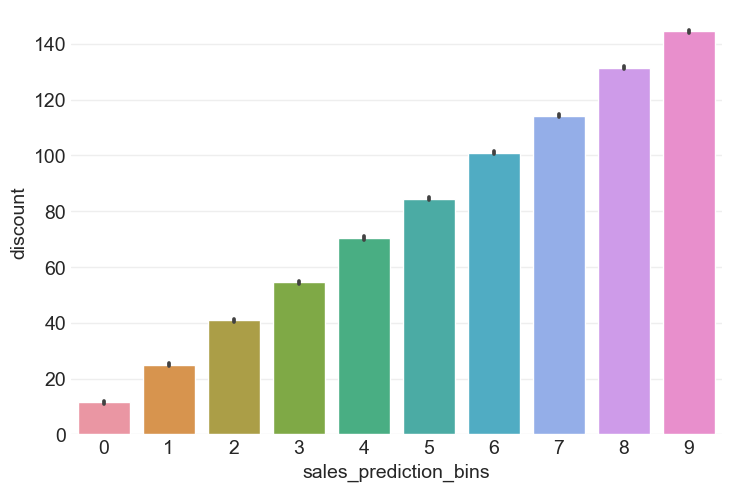

In [12]:
sns.barplot(data=clean_df, x="sales_prediction_bins", y="discount")

<Axes: xlabel='discount', ylabel='profit'>

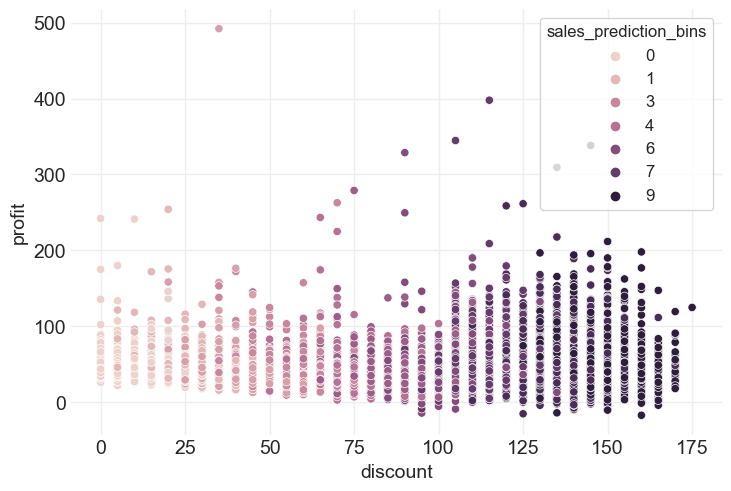

In [13]:
sns.scatterplot(
    data=clean_df,
    x="discount",
    y="profit",
    hue="sales_prediction_bins",
)

## Comments

Even if we suppose there is a positive relationship between discount and profits, this may be obscured by the discounting strategy. Currently, a higher discount is given to those that are predicted to have high sales. It could be that providing discounts to those are who are going to be spending more anyway is having a negative impact on profits. And offering lower discounts to those predited to make less sales is not spurring them to spend more.

Given the treatment assignment mechanism where higher discounts are given to customers within high sales prediction bins, we can make several informed conjectures about the potential outcomes:

For customers with high discounts (high sales prediction bins), the actual observed outcome is likely a product of the existing discount strategy: these customers are purchasing, potentially due to the discount or their natural inclination to buy more. The potential outcome, if these customers received lower discounts - they might still purchase at the same rate due to their predicted high sales behavior, which could lead to higher profit margins for the company. There's a risk that if these customers are consistently given high discounts, they might become less responsive to standard pricing, expecting discounts as a norm, which could affect long-term profitability.

For customers with low discounts (low sales prediction bins), tthe observed outcome might be lower purchase volumes due to either the lower inclination to buy or the smaller discounts offered, leading to standard profit margins on fewer sales. The potential outcome if these customers were offered higher discounts could vary. It might stimulate increased purchasing, leading to higher sales volumes. However, this would be beneficial only if the incremental profit from the additional sales outweighs the loss in profit per unit due to the discount.
There’s a potential for discovering untapped market segments here; customers in these bins might significantly increase their purchasing in response to discounts, which could lead to new revenue opportunities.

# Confounding Bias

In [14]:
sales_regression_results = smf.ols("sales ~ discount", data=clean_df).fit()
print(sales_regression_results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    804.5246      7.790    103.274      0.000     789.255     819.794
discount      21.9248      0.087    251.815      0.000      21.754      22.095


In [15]:
profits_regression_results = smf.ols("profit ~ discount", data=clean_df).fit()
print(profits_regression_results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4217      0.382    103.274      0.000      38.673      40.170
discount       0.0743      0.004     17.419      0.000       0.066       0.083


From the OLS, we expect sales to change by approx. 22 units  for each additional unit of discount whilst the change to profits is a small 0.0743 units increase for each additional unit of discount.

In [16]:
discount_regression_results = smf.ols("discount ~ sales_prediction + age", data=clean_df).fit()
discount_regression_results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-102.3049,1.299,-78.761,0.000,-104.851,-99.759
sales_prediction,0.1011,0.001,119.864,0.000,0.099,0.103
age,2.1037,0.038,55.864,0.000,2.030,2.178


Discount is expected to change by 0.1 units for a unit change in sales_prediction and by 2.1 units for a unit change in age.

## Comments


The observed correlation between discounts and profits should not be mistaken for causation due to the presence of a bias term. This positive bias suggests that customers receiving high discounts might have made larger purchases even without the discounts. Moreover, the difference in expected profits between customers with high and low discounts can be attributed to factors beyond just the discounts, such as differences in age and sales prediction categories (non-exchangeable).

$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$
Therefore, the variations in profits are likely influenced by these additional characteristics, not solely by the level of discount received.

## Causal Model DAG

The relationship between age and discounts is positive, indicating that older customers tend to receive greater discounts. It's plausible that age could also causally affect profit, as older customers may have higher incomes, potentially leading to increased sales and profits. Hence, age is considered a confounder in this scenario. Similarly, sales prediction acts as another confounder, with customers anticipated to purchase more receiving larger discounts. Both age and sales predictions must be accounted for when assessing the impact of discounts on profit to ensure an accurate analysis.

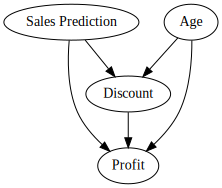

In [17]:
graph = gz.Digraph() 

graph.edge("Discount", "Profit")
# counfounder 1
graph.edge("Sales Prediction", "Discount")
graph.edge("Sales Prediction", "Profit")
# confounder 2
graph.edge("Age", "Discount")
graph.edge("Age", "Profit")

graph

# Regression Adjustment

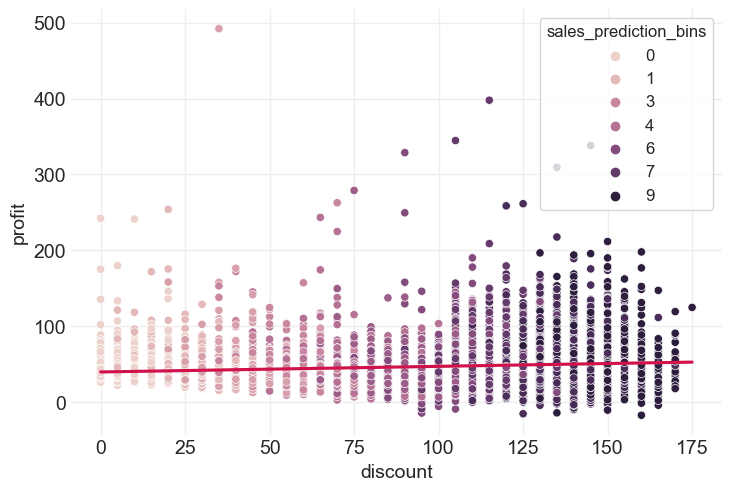

In [18]:
sns.scatterplot(
    data=clean_df,
    x="discount",
    y="profit",
    hue="sales_prediction_bins",
)

sns.regplot(
    data=clean_df,
    x="discount",
    y="profit",
    scatter=False,
)

plt.savefig("images/pre_debiasing.jpg")

## Debiasing 

Whilst we could go with a multiple regression with all the covariates, we instead go through the steps of the FWL theorem to better understand how regression coefficients of a variable are calculated while controlling for other variables in the model.

In [19]:
formula_1 = "discount ~ C(sales_prediction_bins)"   # saled prediction bins are categorical
model_1 = smf.ols(formula_1, data=clean_df).fit()
print(model_1.summary().tables[1])

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        11.4467      0.283     40.460      0.000      10.892      12.001
C(sales_prediction_bins)[T.1]    13.4733      0.400     33.675      0.000      12.689      14.258
C(sales_prediction_bins)[T.2]    29.4382      0.400     73.614      0.000      28.654      30.222
C(sales_prediction_bins)[T.3]    43.0857      0.400    107.634      0.000      42.301      43.870
C(sales_prediction_bins)[T.4]    58.9800      0.400    147.413      0.000      58.196      59.764
C(sales_prediction_bins)[T.5]    72.9933      0.400    182.438      0.000      72.209      73.778
C(sales_prediction_bins)[T.6]    89.5300      0.400    223.769      0.000      88.746      90.314
C(sales_prediction_bins)[T.7]   102.7200      0.400    256.736      0.000     101.936     103.504
C(sales_prediction_b

<Axes: xlabel='discount_res', ylabel='profit'>

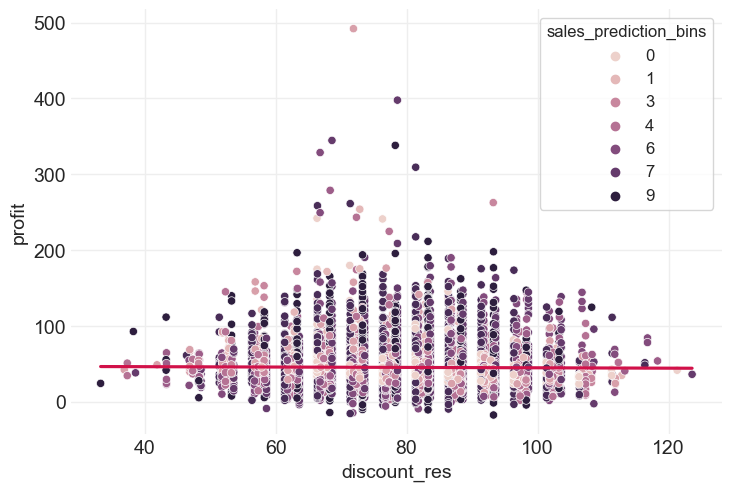

In [20]:
df_discount_res = clean_df.assign(
    discount_res=model_1.resid + clean_df["discount"].mean()
)

df_discount_res.head()

sns.scatterplot(
    data=df_discount_res,
    x="discount_res",
    y="profit",
    hue="sales_prediction_bins",
) 

sns.regplot(
    data=df_discount_res,
    x="discount_res",
    y="profit",
    scatter=False,
)

We see that the customers with high residualized discounts no longer have high sales_prediction_bins. The debiasing step has made the residual discount seem as good as randomly assigned.

## Denoising

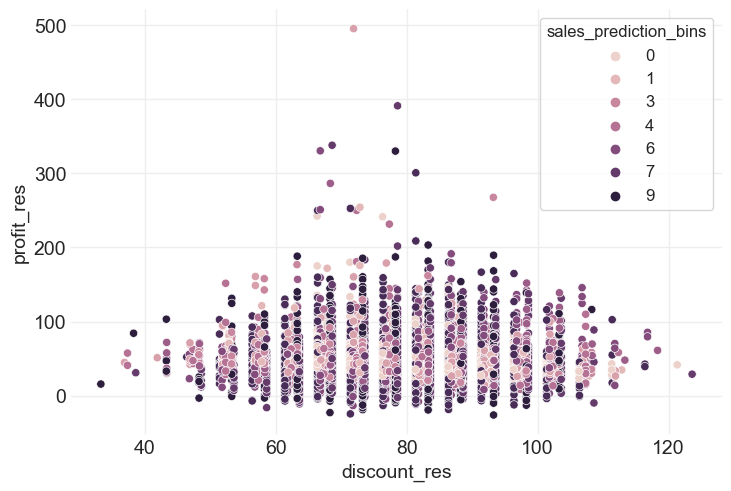

In [21]:
denoising_formula = "profit ~ C(sales_prediction_bins)"
denoising_model = smf.ols(
    formula=denoising_formula,
    data=df_discount_res,
).fit()

df_profit_res = df_discount_res.assign(
    profit_res=denoising_model.resid + df_discount_res["profit"].mean(),
)

sns.scatterplot(
    data=df_profit_res,
    x="discount_res",
    y="profit_res",
    hue="sales_prediction_bins",
)

plt.savefig("images/post_debiasing.jpg")

The denoising does not seem to have changed much. It seems that discount (treatment variable) does not explain a lot of the variance in profit (outcome variable)

In [22]:
df_profit_res["profit_res"].var(), df_profit_res["profit"].var()

(512.5731256022978, 545.4015163032522)

The denoising has reduced the variance in the profit variable.

# Final Outcome Model

In [23]:
model_orthogonal = smf.ols(
    formula="profit_res ~ discount_res",
    data=df_profit_res,
).fit()

model_orthogonal.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,47.1222,1.325,35.556,0.000,44.524,49.720
discount_res,-0.0247,0.017,-1.464,0.143,-0.058,0.008


The linear coefficient is slightly negative, however, it is not statistically significant.

In [24]:
model_full = smf.ols(
    formula="profit ~ discount + C(sales_prediction_bins)",
    data=clean_df,
).fit()

model_full.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,45.1995,0.616,73.397,0.000,43.992,46.407
C(sales_prediction_bins)[T.1],0.3418,0.858,0.399,0.690,-1.339,2.023
C(sales_prediction_bins)[T.2],-1.7348,0.964,-1.799,0.072,-3.625,0.156
C(sales_prediction_bins)[T.3],-3.5352,1.102,-3.209,0.001,-5.694,-1.376
C(sales_prediction_bins)[T.4],-4.9727,1.294,-3.842,0.000,-7.510,-2.436
C(sales_prediction_bins)[T.5],-5.4330,1.484,-3.661,0.000,-8.342,-2.524
C(sales_prediction_bins)[T.6],0.9766,1.723,0.567,0.571,-2.400,4.353
C(sales_prediction_bins)[T.7],9.7498,1.921,5.075,0.000,5.984,13.515
C(sales_prediction_bins)[T.8],11.9732,2.187,5.475,0.000,7.687,16.260
C(sales_prediction_bins)[T.9],11.8579,2.393,4.954,0.000,7.167,16.549


As expected, the discount coefficient from the full model is the same as the one we got from the FWL theorem steps.

Lets also add in age as a predicitive varaible to our multiple linear regression model

In [25]:
model_final = smf.ols(
    formula="profit ~ discount + age + C(sales_prediction_bins)",
    data=clean_df,
).fit()

model_final.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.0247,0.972,6.200,0.000,4.120,7.929
C(sales_prediction_bins)[T.1],-3.3510,0.798,-4.200,0.000,-4.915,-1.787
C(sales_prediction_bins)[T.2],-7.7562,0.901,-8.604,0.000,-9.523,-5.989
C(sales_prediction_bins)[T.3],-12.1335,1.035,-11.724,0.000,-14.162,-10.105
C(sales_prediction_bins)[T.4],-15.4909,1.217,-12.725,0.000,-17.877,-13.105
C(sales_prediction_bins)[T.5],-17.2340,1.395,-12.355,0.000,-19.968,-14.500
C(sales_prediction_bins)[T.6],-11.4120,1.615,-7.066,0.000,-14.578,-8.246
C(sales_prediction_bins)[T.7],-3.1408,1.798,-1.747,0.081,-6.666,0.384
C(sales_prediction_bins)[T.8],-1.1977,2.043,-0.586,0.558,-5.202,2.807
C(sales_prediction_bins)[T.9],0.3677,2.229,0.165,0.869,-4.001,4.737


The addition of age has susbtantially increased the significance of the discount parameter.

# Final Recommendation

After getting rid of the confounding bias (from sales_prediction_bins and age), discount has a negative causal effect on profits. Our model DAG now becomes

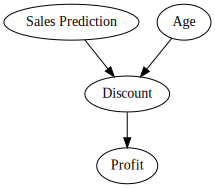

In [26]:
graph_2 = gz.Digraph() 

graph_2.edge("Discount", "Profit")
graph_2.edge("Sales Prediction", "Discount")
graph_2.edge("Age", "Discount")

graph_2

**We would recommend the company to stop giving discounts or to switch to a better discount strategy.**